<div align="center">
  <h1><b> Quantum Communication and Cryptography </b></h1>
  <h2> Quantum Teleportation </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera"> Lucas Camponogara Viera</a>

# Table of Contents

- [Theory](#theory)
- [Applications](#applications)
- [Qiskit Implementation](#qiskit-implementation)
- [References](#references)

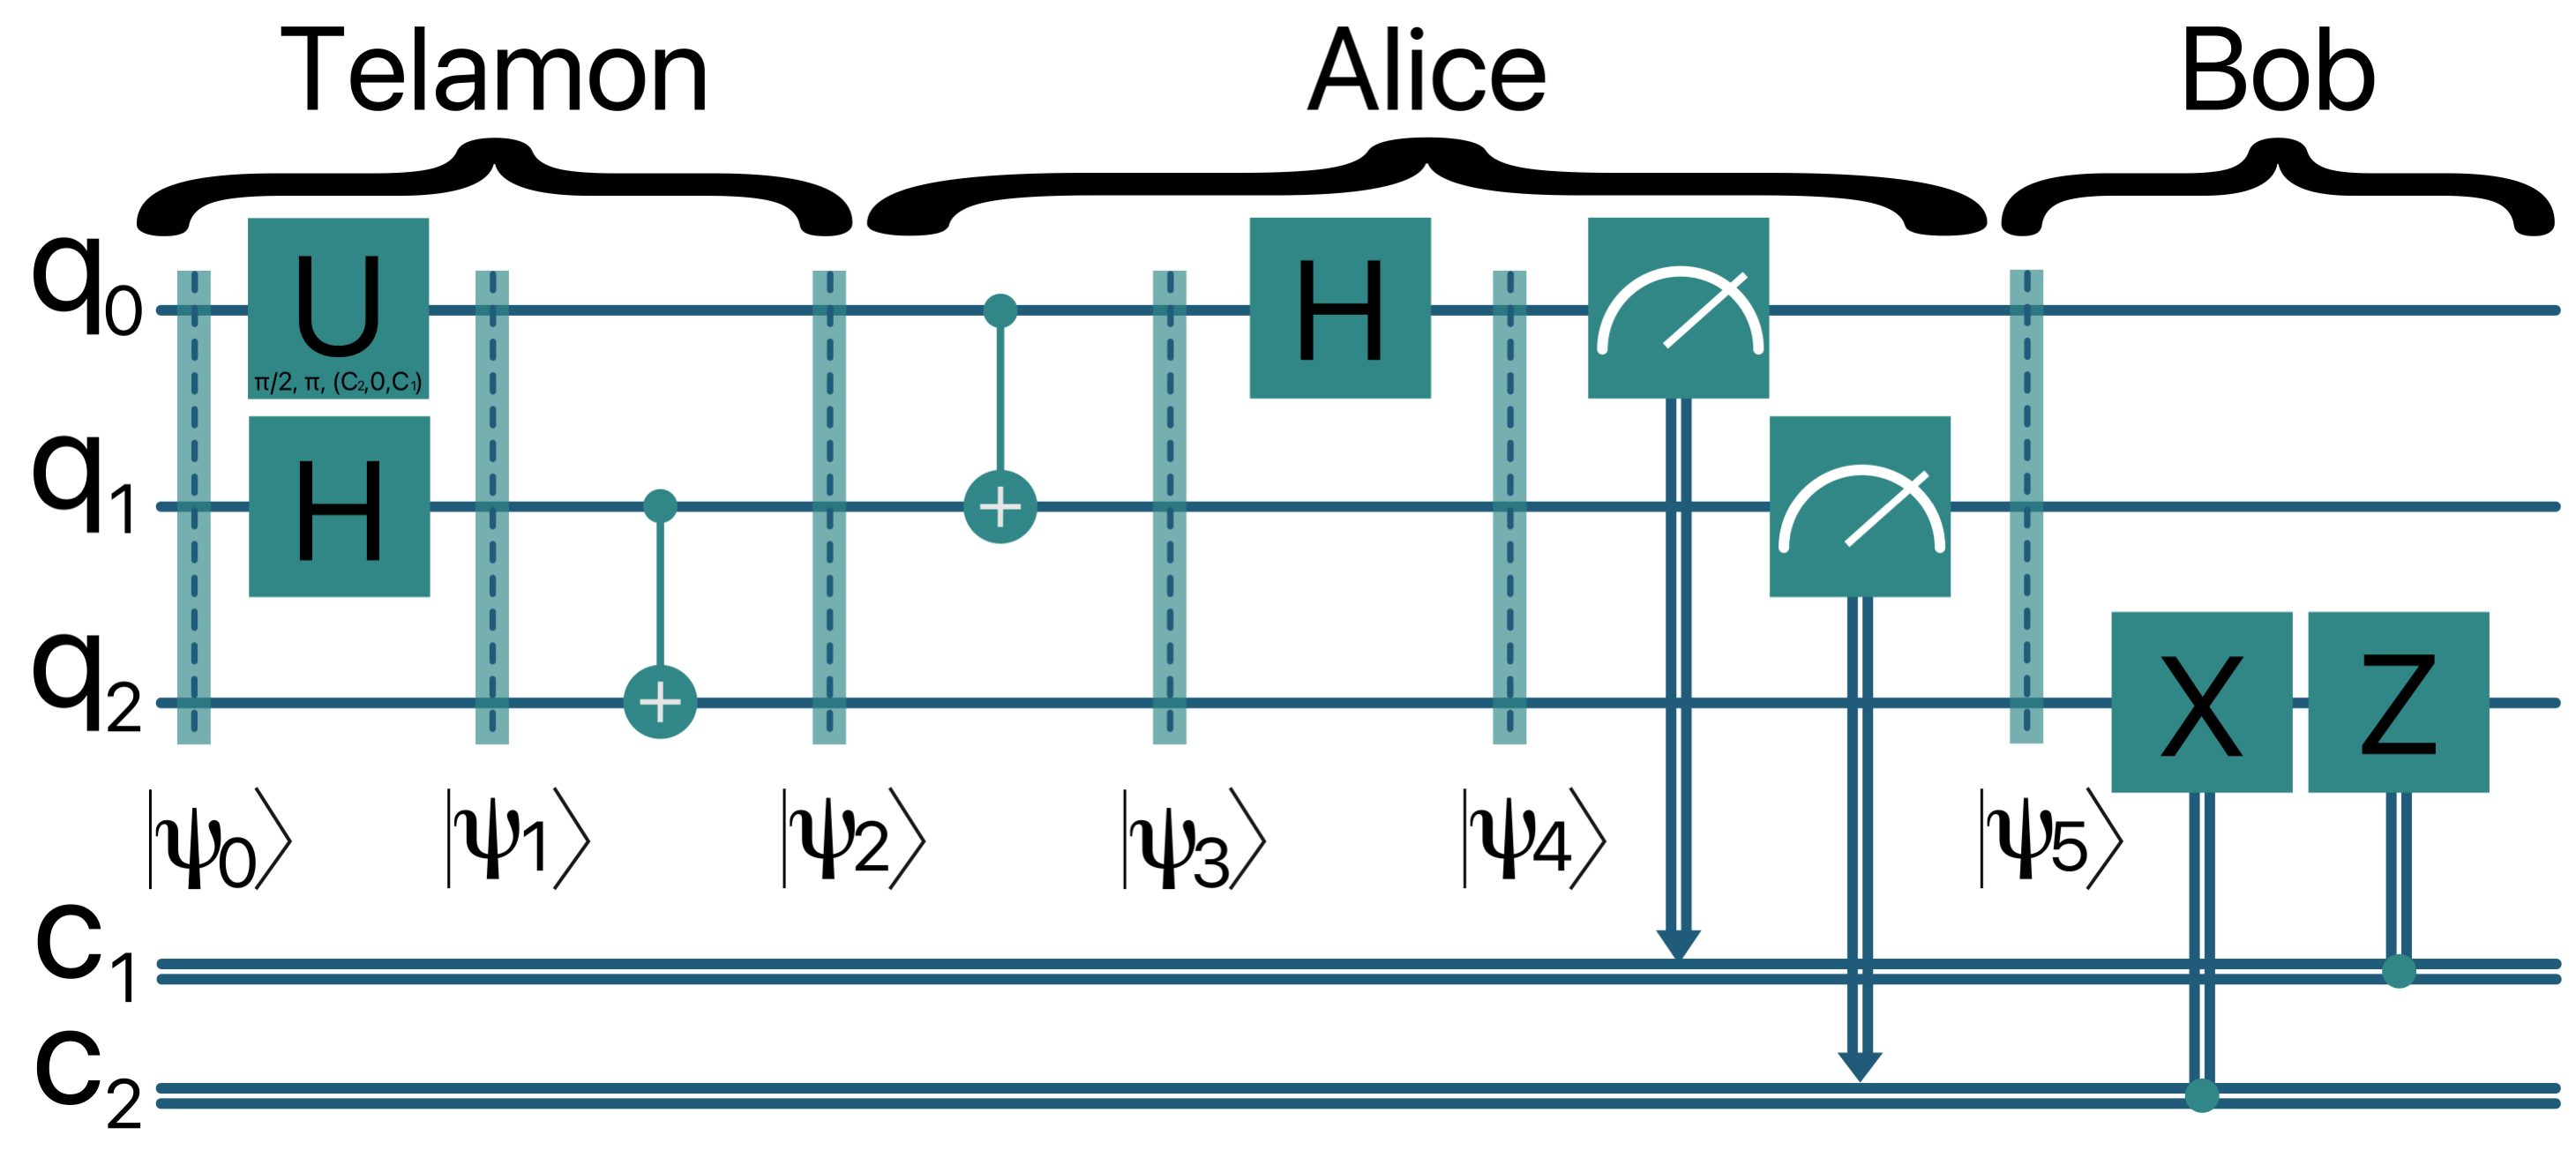

# Theory

**Goal:** Quantum Teleportation allows Alice to transmit/teleport an arbitrary single-qubit state ($|\psi\rangle=c_1|0\rangle + c_2|1\rangle$) to Bob by using a small overhead of two classical bits of information ($c_1$ and $c_2$), provided they share a pre-established entangled pair.

**Steps of the protocol:**

1. A third party, named Telamon, prepares a pair of qubits $q_1$ and $q_2$ in a maximally entangled Bell state $|\psi^{Bell}\rangle_{AB}$ and then sends qubit $q_1$ to Alice and qubit $q_2$ to Bob.
2. Alice applies a single-qubit unitary gate $U$ to qubit $q_0$ to prepare the state $|\psi\rangle$.
3. Alice jointly measures the unknown qubit ($q_0$) and her entangled qubit ($q_1$) in the Bell basis (Bell measurement), projecting them into one of four Bell states while destroying the original entanglement between $q_1$ and $q_2$. The act of measurement collapses the Bell state of $q_0$ and $q_1$ into classical bits (cbits) $c_0$ and $c_1$, respectively. 
4. Alice sends the two classical bits to Bob through a classical communication channel.
5. To reconstruct the original state $|\psi\rangle$, Bob applies one of four unitary operations {$\mathbb{I}_d, X, Z, ZX$} on his qubit $q_2$, depending on the classical information (cbits) he receives from Alice. 

Any arbitrary single qubit unitary gate can be written as:

\begin{align}
    U &= e^{i\alpha}R_{\hat{n}}(\theta)=e^{i\alpha} e^{-i\theta \hat{n} \cdot \vec{\sigma}/2}\\
    &=e^{i\alpha} \left(cos\left(\frac{\theta}{2}\right)\mathbb{I}_2-sin\left(\frac{\theta}{2}\right)(\hat{n}\cdot \vec{\sigma})\right),
\end{align}

given $a$ and $\theta \in \mathbb{R}$, $i^2=-1$, 3-dimensional unit vector $\hat{n}=(n_x, n_y, n_z)$, and three component vector $\vec{\sigma}=(X, Y, Z)$. 

A random 1-qubit state then reads:

\begin{align}
|\psi\rangle = \left(e^{i(\frac{\pi}{2})}R_{(c_2, 0, c_1)}(\pi)\right)|0\rangle = c_1 |0\rangle+ c_2 |1\rangle.
\end{align}

The evolution of the quantum state of the system throughout the circuit is given as follows:

- Each qubit in a real quantum computer is initialized in the ground state $|0\rangle$. The initial global state of the composite tripartite system is, therefore:

\begin{align}
    |\psi_0\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle \doteq |000\rangle.
\end{align}

- Telamon then applies a Hadamard gate to qubit $q_1$, while qubit $q_0$ is owned by Alice:

\begin{align}
U|0\rangle&= |\psi\rangle=c_1|0\rangle + c_2|1\rangle,\\
H|0\rangle&=|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle,\\
    |\psi_1\rangle &=(U\otimes H\otimes \mathbb{I})|\psi_0\rangle\\
    &=U|0\rangle \otimes H|0\rangle \otimes |0\rangle\\
    &=|\psi\rangle\otimes |+\rangle \otimes |0\rangle\\
    &=|\psi\rangle\otimes\left(\frac{|0\rangle+ |1\rangle}{\sqrt{2}} \otimes |0\rangle\right)\\
    &=|\psi\rangle\otimes\left(\frac{|00\rangle+|10\rangle}{\sqrt{2}} \right)\\
    &= \frac{c_1|000\rangle+c_2|100\rangle+c_1|010\rangle+c_2|110\rangle}{\sqrt{2}}.
\end{align}

- The following cNOT gate applied to qubit $q_2$ (target) controlled by $q_1$ creates an entangled Bell state. The action of the cNOT gate is to flip the target qubit (the rightmost qubit) if the control (the leftmost qubit) is $|1\rangle$:
  
\begin{align}
    cNOT\bigg(|+\rangle \otimes |0\rangle\bigg)
    &= cNOT\left(\frac{|00\rangle+|10\rangle}{\sqrt{2}}\right)\\ &=\frac{|00\rangle+|11\rangle}{\sqrt{2}} \\&\doteq |e\rangle,
\end{align}

and the global state of the system updates to

\begin{align}
    |\psi_2\rangle&= (\mathbb{I}_2 \otimes cNOT)|\psi_1\rangle\\
    &=(\mathbb{I}_2 \otimes cNOT)(|\psi\rangle\otimes |+\rangle \otimes |0\rangle)\\
    &= |\psi\rangle \otimes cNOT\bigg(|+\rangle \otimes |0\rangle\bigg)\\
    &= |\psi\rangle \otimes |e\rangle\\
    &= \frac{c_1|000\rangle+c_1|011\rangle+c_2|100\rangle+c_2|111\rangle}{\sqrt{2}}.
\end{align}

- On her turn, Alice applies a cNOT gate on qubit $q_1$ (target) controlled by $q_0$. From left to right, the first qubit is the control and the second is the target, whereas the third remains unchanged:
  
\begin{align}
    |\psi_3\rangle &= (cNOT \otimes \mathbb{I}_2)|\psi_2\rangle\\
    &=\frac{c_1|000\rangle+c_1|011\rangle+c_2|110\rangle+c_2|101\rangle}{\sqrt{2}}.
\end{align}

- Alice then applies a Hadamard gate to $q_0$:
  
\begin{align}
    |\psi_4\rangle &= (H\otimes\mathbb{I}_2\otimes\mathbb{I}_2)|\psi_3\rangle\\
    &=(H\otimes\mathbb{I}_2\otimes\mathbb{I}_2)(cNOT \otimes \mathbb{I}_2)(|\psi\rangle \otimes |e\rangle)\\
    &=\frac{1}{2}\bigg\{c_1\bigg(|000\rangle+|011\rangle+|100\rangle+|111\rangle\bigg)\\
    &+c_2\bigg(|010\rangle+|001\rangle-|110\rangle-|101\rangle\bigg)\bigg\}\\
    &=\frac{1}{2}\bigg\{
    |00\rangle_a\otimes\bigg(c_1|0\rangle_b+c_2|1\rangle_b\bigg)\\
    &+|01\rangle_a\otimes\bigg(c_1|1\rangle_b+c_2|0\rangle_b\bigg)\\
    &+|10\rangle_a\otimes\bigg(c_1|0\rangle_b-c_2|1\rangle_b\bigg)\\
    &+|11\rangle_a\otimes\bigg(c_1|1\rangle_b-c_2|0\rangle_b\bigg)
    \bigg\}\\
    &=\frac{1}{2}\bigg\{|00\rangle_a \otimes \mathbb{I}_2|\psi\rangle + |01\rangle_a \otimes X|\psi\rangle \\
    &+|10\rangle_a \otimes Z|\psi\rangle + |11\rangle_a \otimes XZ|\psi\rangle\bigg\}.
\end{align}

- Upon measurement in the computational basis $(M_{ja}\otimes M_{ia} \otimes \mathbb{I}_2)|\psi_4\rangle$, Alice's subsystem of two qubits denoted $a$ collapses to one of the four classical states, as does Bob's subsystem. The global state of the tripartite system thus becomes one of the following states, each occurring with probability $1/4$:
  
\begin{align}
    |\psi_5\rangle_{ab} = |00\rangle_a\otimes\bigg(c_1|0\rangle_b+c_2|1\rangle_b\bigg),\\
    |\psi_5\rangle_{ab} = |01\rangle_a\otimes\bigg(c_1|1\rangle_b+c_2|0\rangle_b\bigg),\\
    |\psi_5\rangle_{ab} = |10\rangle_a\otimes\bigg(c_1|0\rangle_b-c_2|1\rangle_b\bigg),\\
    |\psi_5\rangle_{ab} = |11\rangle_a\otimes\bigg(c_1|1\rangle_b-c_2|0\rangle_b\bigg).
\end{align}

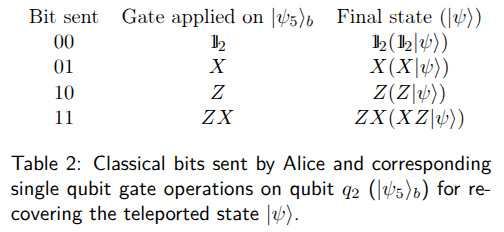

Bennet __et al.__ proved that perfect quantum communication requires at least two maximally entangled qubits. However, open quantum systems are prone to noise processes such as thermalization and dephasing which causes the quantum system to rapidly lose coherent information. In this scenario, 2-qubit maximally entangled pure states (Bell states) are often unavailable, while non-maximal Bell states are insufficient for realization of perfect quantum teleportation and perfect superdense coding. 

A workaround is to use a noise-resilient class of states such as the allured special class of $GHZ$-like and $W$-like maximally entangled tripartite states. Particularly, $W$-like states form a more robust class that can be used even after particle loss. In spite of that, the requirement of non-local operations in quantum communication protocols restricts the aforementioned $w$-like state to only imperfect quantum teleportation and imperfect superdense coding schemes. 

In 2006, Agrawal __et al.__ showed that a class of 3-qubit $W$-like nonmaximally entangled states meet the criteria for both perfect teleportation and superdense coding. For a generalization of the scheme to higher dimensions, the reader may resort to Li __et al.__

# Applications

1. Can be used as a resource for 1-qubit communication.

2. To build noise-resilient quantum gates.

# Qiskit Implementation

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image

Full Teleportation Circuit (Check your Exercises 1, 2, 3):


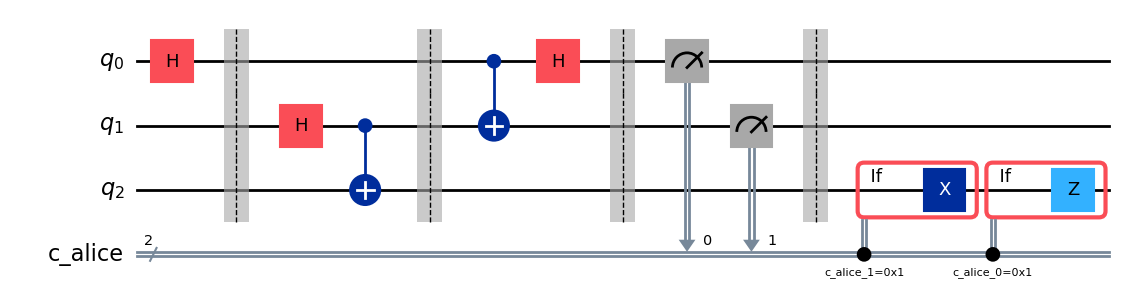

In [ ]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)

teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])

teleport_qc.barrier()

# Step 2: Alice's Bell Measurement (gates part))

teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])

teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# Step 3: Bob's Conditional Corrections on q2
# IMPORTANT: .c_if() on gates like XGate() no longer works directly as in older Qiskit versions.
# The recommended method in Qiskit 1.0+ is to use the new `if_test` context manager.

with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])

with teleport_qc.if_test((cr_alice_tele[0], 1)):
    teleport_qc.z(qr_tele[2])
    
print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


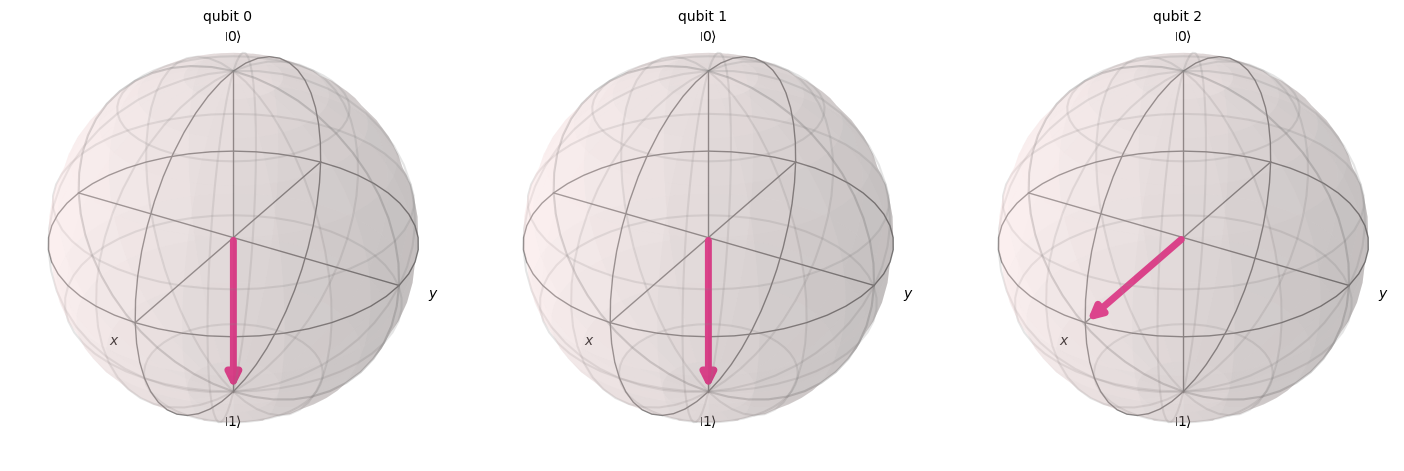

In [3]:
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    
    bloch_plot = plot_bloch_multivector(final_statevector)
    plt.show()
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

- The teleported state of q2 should be |+>, identical to the original state of q0.
- q0 and q1 states should collapse after measurement.

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 

[2] https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation.

[3] Qiskit Global Summer School 2025, https://github.com/qiskit-community/qgss-2025/tree/main?tab=readme-ov-file.